- LeakyRelu:
    + $$ y = 
    \left\{\begin{matrix}
        x,x>0\\
        ax,x<0(a>0)
    \end{matrix}\right.$$
    
- GELU:
    + 正态分布的累积分布

In [4]:
from transformers import AutoModel

In [5]:
model_ckpt = 'bert-base-uncased'
model = AutoModel.from_pretrained(model_ckpt)
model.encoder.layer[0]

C:\ProgramData\Anaconda3\envs\pytorch1_13\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\WZJ\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cl

BertLayer(
  (attention): BertAttention(
    (self): BertSelfAttention(
      (query): Linear(in_features=768, out_features=768, bias=True)
      (key): Linear(in_features=768, out_features=768, bias=True)
      (value): Linear(in_features=768, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (output): BertSelfOutput(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (intermediate): BertIntermediate(
    (dense): Linear(in_features=768, out_features=3072, bias=True)
    (intermediate_act_fn): GELUActivation()
  )
  (output): BertOutput(
    (dense): Linear(in_features=3072, out_features=768, bias=True)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

(intermediate_act_fn): GELUActivation()

In [10]:
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch

## GLUE展示

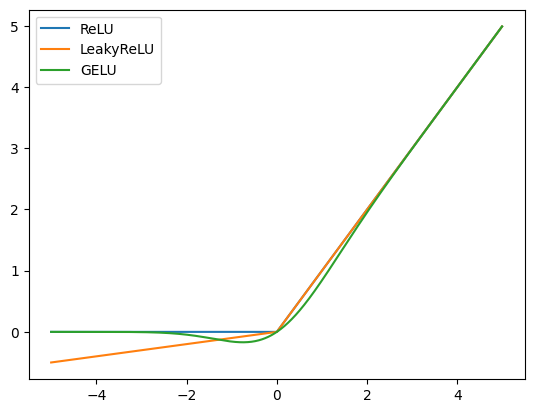

In [13]:
x = torch.from_numpy(np.arange(-5,5,0.01))
plt.plot(x, nn.ReLU()(x))
plt.plot(x, nn.LeakyReLU(negative_slope=0.1)(x))
plt.plot(x, nn.GELU()(x))
plt.legend(['ReLU','LeakyReLU','GELU'])

## GULE 梯度展示

In [30]:
from scipy.special import erf
from scipy.stats import norm
import math
def gelu_grad(x):
    return (1+erf(x/math.sqrt(2)))/2 + x*norm.pdf(x)

In [26]:
x = torch.tensor([1.,2.,3.], requires_grad=True)
z = nn.GELU()(x).sum() 
z.backward()
x.grad

tensor([1.0833, 1.0852, 1.0119])

In [31]:
gelu_grad(x.detach().numpy()) # 提取出节点x的值，并且计算梯度

array([1.08331544, 1.08523179, 1.01194562])

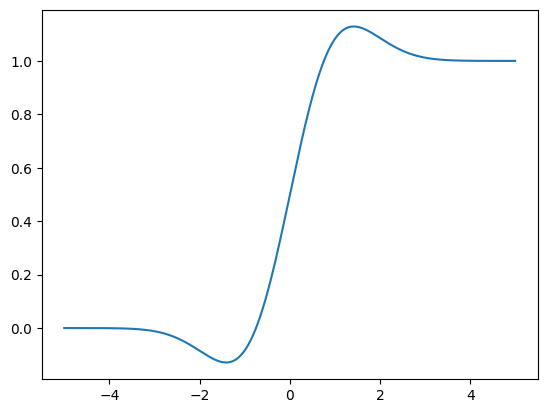

In [32]:
x = np.arange(-5,5,.01)
plt.plot(x, gelu_grad(x))